In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
np.set_printoptions(precision=4)

In [165]:
loans = pd.read_csv("./lending-club-data.csv")

C:\Users\Witek\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [166]:
loans.shape

(122607, 68)

In [167]:
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'is_inc_v', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'not_compliant', 'status', 'inactive_loans', 'bad_loans',
       'emp_length_num', 'grade_num', 'sub_gra

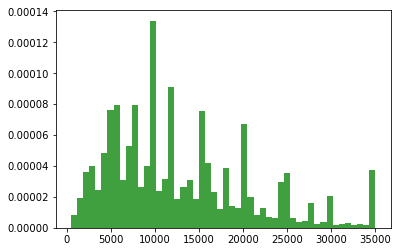

In [168]:
n, bins, patches = plt.hist(loans["loan_amnt"], 50, normed=1, facecolor='green', alpha=0.75)

3,4)

In [169]:
loans["safe_loans"] = - 2 * loans["bad_loans"] + 1

In [170]:
positive = sum(loans["safe_loans"] == 1) / len(loans["safe_loans"])
format(positive, '.2f')

'0.81'

5)

In [171]:
features = ['grade',                     # grade of the loan
            'sub_grade',                 # sub-grade of the loan
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'term',                      # the term of the loan
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
           ]

target = 'safe_loans'                    # prediction target (y) (+1 means safe, -1 is risky)

# Extract the feature columns and target column
loans = loans[features + [target]]

In [172]:
with open('./module-5-assignment-1-train-idx.json') as data_file:    
    train = json.load(data_file)
    
with open('./module-5-assignment-1-validation-idx.json') as data_file:    
    validation = json.load(data_file)

In [173]:
train_data = loans.loc[train]
validation_data = loans.loc[validation]

In [174]:
print(sum(train_data["safe_loans"] == 1)/len(train_data))
print(sum(train_data["safe_loans"] != 1)/len(train_data))
print(len(train_data))

0.503653556845
0.496346443155
37224


In [175]:
from sklearn.preprocessing import OneHotEncoder

In [176]:
loans_types = loans.dtypes.reset_index()
loans_types.columns = ["feature", "type"]
    
categorical_features = loans_types["feature"][loans_types["type"] == "object"]

In [177]:
train_data.head(n=5)

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans
1,C,C4,1,1,RENT,1.00,car,60 months,1,1,9.4,0.0,-1
6,F,F2,0,5,OWN,5.55,small_business,60 months,1,1,32.6,0.0,-1
7,B,B5,1,1,RENT,18.08,other,60 months,1,1,36.5,0.0,-1
10,C,C1,1,1,RENT,10.08,debt_consolidation,36 months,1,1,91.7,0.0,-1
12,B,B2,0,4,RENT,7.06,other,36 months,1,1,55.5,0.0,-1


In [178]:
def work_with_data(data):
    
    #data["term"] = data["term"].astype('str')
    #data["term"] = data["term"].str.replace(" months", "")
    #data["term"] = data["term"].astype('int')
    
    data_types = data.dtypes.reset_index()
    data_types.columns = ["feature", "type"]
    
    categorical_features = data_types["feature"][data_types["type"] == "object"]
    numerical_features = data_types["feature"][data_types["type"] != "object"]
    
    cat_dat = data[categorical_features]
    num_dat = data[numerical_features]
    
    
    
    for cat_feat in categorical_features:
        
        cat_dat_tmp = data[cat_feat].unique()
        
        for cd in cat_dat_tmp:
            cat_dat[cat_feat + "_" + cd] = 1 * (cat_dat[cat_feat] == cd)
        
        del cat_dat[cat_feat]
        
    output = pd.concat([cat_dat, num_dat], axis =1)
    return output

In [179]:
train_data = work_with_data(train_data)
validation_data = work_with_data(validation_data)

C:\Users\Witek\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [180]:
train_data.columns

Index(['grade_C', 'grade_F', 'grade_B', 'grade_E', 'grade_D', 'grade_A',
       'grade_G', 'sub_grade_C4', 'sub_grade_F2', 'sub_grade_B5',
       'sub_grade_C1', 'sub_grade_B2', 'sub_grade_B4', 'sub_grade_B3',
       'sub_grade_C2', 'sub_grade_B1', 'sub_grade_C5', 'sub_grade_E4',
       'sub_grade_D3', 'sub_grade_D2', 'sub_grade_D5', 'sub_grade_A2',
       'sub_grade_C3', 'sub_grade_A3', 'sub_grade_A5', 'sub_grade_A4',
       'sub_grade_E1', 'sub_grade_D1', 'sub_grade_E5', 'sub_grade_D4',
       'sub_grade_F1', 'sub_grade_E3', 'sub_grade_G2', 'sub_grade_E2',
       'sub_grade_F5', 'sub_grade_F4', 'sub_grade_F3', 'sub_grade_G4',
       'sub_grade_G3', 'sub_grade_G1', 'sub_grade_A1', 'sub_grade_G5',
       'home_ownership_RENT', 'home_ownership_OWN', 'home_ownership_MORTGAGE',
       'home_ownership_OTHER', 'purpose_car', 'purpose_small_business',
       'purpose_other', 'purpose_debt_consolidation', 'purpose_major_purchase',
       'purpose_credit_card', 'purpose_home_improvement', 'pur

In [181]:
train_data.head(n=5)

,grade_C,grade_F,grade_B,grade_E,grade_D,grade_A,grade_G,sub_grade_C4,sub_grade_F2,sub_grade_B5,...,term_ 60 months,term_ 36 months,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans
1,1,0,0,0,0,0,0,1,0,0,...,1,0,1,1,1.00,1,1,9.4,0.0,-1
6,0,1,0,0,0,0,0,0,1,0,...,1,0,0,5,5.55,1,1,32.6,0.0,-1
7,0,0,1,0,0,0,0,0,0,1,...,1,0,1,1,18.08,1,1,36.5,0.0,-1
10,1,0,0,0,0,0,0,0,0,0,...,0,1,1,1,10.08,1,1,91.7,0.0,-1
12,0,0,1,0,0,0,0,0,0,0,...,0,1,0,4,7.06,1,1,55.5,0.0,-1


9)

In [182]:
import sklearn, sklearn.tree
#import graphviz

In [183]:
from __future__ import print_function

In [184]:
train_target = train_data[target].values
train_features = train_data.copy()
del train_features[target]
train_features = train_features.values

In [185]:
validation_target = validation_data[target].values
validation_features = validation_data.copy()
del validation_features[target]
validation_features = validation_features.values

In [186]:
decision_tree_model = sklearn.tree.DecisionTreeClassifier(max_depth = 6)
small_model = sklearn.tree.DecisionTreeClassifier(max_depth = 2)

In [187]:
decision_tree_model.fit(train_features, train_target)
small_model.fit(train_features, train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

11)

In [188]:
validation_safe_loans = validation_data[validation_data[target] == 1]
validation_risky_loans = validation_data[validation_data[target] == -1]

sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data

,grade_D,grade_A,grade_F,grade_B,grade_C,grade_E,grade_G,sub_grade_D2,sub_grade_A5,sub_grade_F2,...,term_ 60 months,term_ 36 months,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans
19,0,0,0,1,0,0,0,0,0,0,...,0,1,0,11,11.18,1,1,82.4,0.0,1
79,1,0,0,0,0,0,0,0,0,0,...,0,1,0,10,16.85,1,1,96.4,0.0,1
24,1,0,0,0,0,0,0,1,0,0,...,1,0,0,3,13.97,0,1,59.5,0.0,-1
41,0,1,0,0,0,0,0,0,1,0,...,0,1,0,11,16.33,1,1,62.1,0.0,-1


In [189]:
del sample_validation_data["safe_loans"]

In [190]:
print(decision_tree_model.predict(sample_validation_data))
print(small_model.predict(sample_validation_data))

[-1  1 -1 -1]
[-1 -1 -1 -1]


In [191]:
print(decision_tree_model.predict_proba(sample_validation_data))
print(small_model.predict_proba(sample_validation_data))

[[ 0.5363  0.4637]
 [ 0.4441  0.5559]
 [ 0.5404  0.4596]
 [ 0.5363  0.4637]]
[[ 0.5926  0.4074]
 [ 0.5926  0.4074]
 [ 0.5926  0.4074]
 [ 0.5926  0.4074]]


In [192]:
predicted_validation_model = decision_tree_model.predict(validation_features)
predicted_validation_small_model = small_model.predict(validation_features)

In [193]:
print(sum(predicted_validation_model == validation_target) / predicted_validation_model.shape[0])
print(sum(predicted_validation_small_model == validation_target) / predicted_validation_small_model.shape[0])

0.469625161568
0.454868591125


In [194]:
decision_tree_model.predict_proba(train_features)

array([[ 0.5404,  0.4596],
       [ 0.6475,  0.3525],
       [ 0.5317,  0.4683],
       ..., 
       [ 0.2079,  0.7921],
       [ 0.7291,  0.2709],
       [ 0.5363,  0.4637]])

In [195]:
small_model.predict_proba(train_features)

array([[ 0.5926,  0.4074],
       [ 0.5926,  0.4074],
       [ 0.419 ,  0.581 ],
       ..., 
       [ 0.2312,  0.7688],
       [ 0.5926,  0.4074],
       [ 0.5926,  0.4074]])

15)
Answer few lines above

16, 17)

In [196]:
print(decision_tree_model.score(train_features, train_target))
print(small_model.score(train_features, train_target))

0.640527616591
0.613502041694


In [197]:
print(decision_tree_model.score(validation_features, validation_target))
print(small_model.score(validation_features, validation_target))

0.469625161568
0.454868591125


18)

In [203]:
large_model = sklearn.tree.DecisionTreeClassifier(max_depth = 20)
large_model.fit(train_features, train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [204]:
print(large_model.score(train_features, train_target))
print(large_model.score(validation_features, validation_target))

0.855818826564
0.498599741491


19)

In [205]:
def cost_of_prediction(model, costs, data_feature, data_target):
    
    #costs[0] - cost of false positive
    #costs[1] - cost of false negative
    
    print("model accuracy is " + str(model.score(data_feature, data_target)))
    
    model_prediction = model.predict(data_feature)
    false_positive = sum((model_prediction == 1) & (data_target == -1))
    false_negative = sum((model_prediction == -1) & (data_target == 1))
    
    print("false_positive is " + str(false_positive) + " and the cost is " + 
          str(false_positive * costs[0]))
    print("false_negative is " + str(false_negative) + " and the cost is " + 
          str(false_negative * costs[1]))
    print("overall cost is " + str(false_positive * costs[0] + false_negative * costs[1]))

In [206]:
costs = [20000, 10000]

In [207]:
cost_of_prediction(small_model, costs, validation_features, validation_target)

model accuracy is 0.454868591125
false_positive is 858 and the cost is 17160000
false_negative is 4203 and the cost is 42030000
overall cost is 59190000


In [208]:
cost_of_prediction(decision_tree_model, costs, validation_features, validation_target)

model accuracy is 0.469625161568
false_positive is 921 and the cost is 18420000
false_negative is 4003 and the cost is 40030000
overall cost is 58450000


In [209]:
cost_of_prediction(large_model, costs, validation_features, validation_target)

model accuracy is 0.498599741491
false_positive is 1430 and the cost is 28600000
false_negative is 3225 and the cost is 32250000
overall cost is 60850000
